In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Import 1M EURUSD 2001 - 2017

df = pd.read_csv('/Users/alvinchung/Dropbox/University/Personal/Jupter_notebook/DataSets/Currency/EURUSD.txt')
df.head()

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,EURUSD,20010102,230100,0.9507,0.9507,0.9507,0.9507,4
1,EURUSD,20010102,230200,0.9506,0.9506,0.9505,0.9505,4
2,EURUSD,20010102,230300,0.9505,0.9507,0.9505,0.9506,4
3,EURUSD,20010102,230400,0.9506,0.9506,0.9506,0.9506,4
4,EURUSD,20010102,230500,0.9506,0.9506,0.9506,0.9506,4


In [6]:
# Import 1M USDCHF 2001 - 2017
df1 = pd.read_csv('/Users/alvinchung/Dropbox/University/Personal/Jupter_notebook/DataSets/Currency/USDCHF.txt')
df1.head()

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,USDCHF,20010102,230100,1.5989,1.5990,1.5988,1.5988,4
1,USDCHF,20010102,230200,1.5988,1.5988,1.5988,1.5988,4
2,USDCHF,20010102,230300,1.5990,1.5991,1.5990,1.5991,4
3,USDCHF,20010102,230400,1.5991,1.5991,1.5991,1.5991,4
4,USDCHF,20010102,230500,1.5991,1.5991,1.5990,1.5990,4


In [7]:
# Check if data contains any null values
print(df.isnull().any())
print(df1.isnull().any())

<TICKER>        False
<DTYYYYMMDD>    False
<TIME>          False
<OPEN>          False
<HIGH>          False
<LOW>           False
<CLOSE>         False
<VOL>           False
dtype: bool
<TICKER>        False
<DTYYYYMMDD>    False
<TIME>          False
<OPEN>          False
<HIGH>          False
<LOW>           False
<CLOSE>         False
<VOL>           False
dtype: bool


In [8]:
# left inner union EURUSD to USDCHF
df = pd.merge(df, df1, on= ['<DTYYYYMMDD>','<TIME>'])
df.head()

,<TICKER>_x,<DTYYYYMMDD>,<TIME>,<OPEN>_x,<HIGH>_x,<LOW>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<OPEN>_y,<HIGH>_y,<LOW>_y,<CLOSE>_y,<VOL>_y
0,EURUSD,20010102,230100,0.9507,0.9507,0.9507,0.9507,4,USDCHF,1.5989,1.5990,1.5988,1.5988,4
1,EURUSD,20010102,230200,0.9506,0.9506,0.9505,0.9505,4,USDCHF,1.5988,1.5988,1.5988,1.5988,4
2,EURUSD,20010102,230300,0.9505,0.9507,0.9505,0.9506,4,USDCHF,1.5990,1.5991,1.5990,1.5991,4
3,EURUSD,20010102,230400,0.9506,0.9506,0.9506,0.9506,4,USDCHF,1.5991,1.5991,1.5991,1.5991,4
4,EURUSD,20010102,230500,0.9506,0.9506,0.9506,0.9506,4,USDCHF,1.5991,1.5991,1.5990,1.5990,4


In [9]:
# Descriptive Statistics
df.describe()

,<DTYYYYMMDD>,<TIME>,<OPEN>_x,<HIGH>_x,<LOW>_x,<CLOSE>_x,<VOL>_x,<OPEN>_y,<HIGH>_y,<LOW>_y,<CLOSE>_y,<VOL>_y
count,5.583225e+06,5.583225e+06,5.583225e+06,5.583225e+06,5.583225e+06,5.583225e+06,5583225.0,5.583225e+06,5.583225e+06,5.583225e+06,5.583225e+06,5583225.0
mean,2.009006e+07,1.163991e+05,1.250523e+00,1.250602e+00,1.250443e+00,1.250523e+00,4.0,1.126337e+00,1.126412e+00,1.126262e+00,1.126337e+00,4.0
std,4.528685e+04,6.781818e+04,1.587750e-01,1.587901e-01,1.587601e-01,1.587750e-01,0.0,2.196976e-01,2.197125e-01,2.196826e-01,2.196973e-01,0.0
min,2.001010e+07,0.000000e+00,8.350000e-01,8.350000e-01,8.350000e-01,8.350000e-01,4.0,7.100000e-01,7.108000e-01,7.068000e-01,7.098000e-01,4.0
25%,2.005091e+07,6.050000e+04,1.139100e+00,1.139200e+00,1.139000e+00,1.139100e+00,4.0,9.552000e-01,9.552000e-01,9.551000e-01,9.552000e-01,4.0
50%,2.009070e+07,1.150000e+05,1.281400e+00,1.281500e+00,1.281300e+00,1.281400e+00,4.0,1.064100e+00,1.064200e+00,1.064000e+00,1.064100e+00,4.0
75%,2.013042e+07,1.732000e+05,1.356000e+00,1.356100e+00,1.355900e+00,1.356000e+00,4.0,1.246300e+00,1.246300e+00,1.246200e+00,1.246300e+00,4.0
max,2.017023e+07,2.359000e+05,1.603300e+00,1.603600e+00,1.602700e+00,1.603400e+00,4.0,1.822100e+00,1.822100e+00,1.821700e+00,1.822000e+00,4.0


In [10]:
# Info on Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5583225 entries, 0 to 5583224
Data columns (total 14 columns):
<TICKER>_x      object
<DTYYYYMMDD>    int64
<TIME>          int64
<OPEN>_x        float64
<HIGH>_x        float64
<LOW>_x         float64
<CLOSE>_x       float64
<VOL>_x         int64
<TICKER>_y      object
<OPEN>_y        float64
<HIGH>_y        float64
<LOW>_y         float64
<CLOSE>_y       float64
<VOL>_y         int64
dtypes: float64(8), int64(4), object(2)
memory usage: 638.9+ MB


In [11]:
# Rename Headers 
df = df.rename(columns = {'<CLOSE>_x':'EURUSD_CLOSE'})
df = df.rename(columns = {'<CLOSE>_y':'USDCHF_CLOSE'})
df = df.rename(columns = {'<TIME>':'TIME'})
df = df.rename(columns = {'<DTYYYYMMDD>':'DATE'})
df = df.rename(columns = {'<OPEN>_x':'EURUSD_OPEN'})
df = df.rename(columns = {'<OPEN>_y':'USDCHF_OPEN'})

In [12]:
# Query Data from 2017/01/10 - 2017/01/12 onwards
df = df.query('DATE > 20170109')
df = df.query('DATE < 20170113')

In [13]:
#Calculate change in Pips From Open to Close
eurusdPipDif = df.EURUSD_OPEN - df.EURUSD_CLOSE
usdchfPipDif = df.USDCHF_OPEN - df.USDCHF_CLOSE
df['EURUSD_PIPCHG'] = eurusdPipDif
df['USDCHF_PIPCHG'] = usdchfPipDif

In [14]:
# Review Data
df.head()

,<TICKER>_x,DATE,TIME,EURUSD_OPEN,<HIGH>_x,<LOW>_x,EURUSD_CLOSE,<VOL>_x,<TICKER>_y,USDCHF_OPEN,<HIGH>_y,<LOW>_y,USDCHF_CLOSE,<VOL>_y,EURUSD_PIPCHG,USDCHF_PIPCHG
5532293,EURUSD,20170110,0,1.0583,1.0583,1.0583,1.0583,4,USDCHF,1.0139,1.0139,1.0139,1.0139,4,0.0,0.0
5532294,EURUSD,20170110,100,1.0582,1.0582,1.0582,1.0582,4,USDCHF,1.0139,1.0139,1.0139,1.0139,4,0.0,0.0
5532295,EURUSD,20170110,200,1.0582,1.0582,1.0582,1.0582,4,USDCHF,1.0138,1.0138,1.0138,1.0138,4,0.0,0.0
5532296,EURUSD,20170110,300,1.0582,1.0582,1.0582,1.0582,4,USDCHF,1.0138,1.0138,1.0138,1.0138,4,0.0,0.0
5532297,EURUSD,20170110,400,1.0582,1.0582,1.0582,1.0582,4,USDCHF,1.0138,1.0138,1.0138,1.0138,4,0.0,0.0


In [15]:
# Import Visual Libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/alvinchung/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


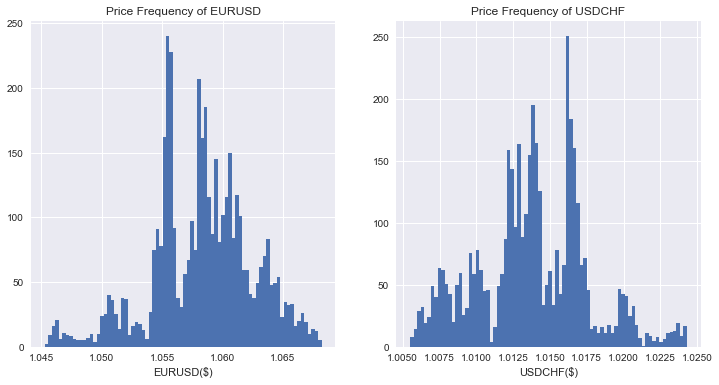

In [16]:
# Histogram Visualisation on Dataset
fig = plt.figure(figsize=(12,6))
xau = fig.add_subplot(121)
jpy = fig.add_subplot(122)

xau.hist(df.EURUSD_CLOSE, bins=80)
xau.set_xlabel('EURUSD($)')
xau.set_title("Price Frequency of EURUSD")

jpy.hist(df.USDCHF_CLOSE, bins=80)
jpy.set_xlabel('USDCHF($)')
jpy.set_title("Price Frequency of USDCHF")

In [17]:
# ordinary least squares EURUSD_CLOSE TO USDCHF_CLOSE
m = ols('EURUSD_CLOSE ~ USDCHF_CLOSE ',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           EURUSD_CLOSE   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.667e+05
Date:                Sat, 22 Jul 2017   Prob (F-statistic):               0.00
Time:                        02:22:00   Log-Likelihood:                 26459.
No. Observations:                4320   AIC:                        -5.291e+04
Df Residuals:                    4318   BIC:                        -5.290e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1780      0.002   1004.571   

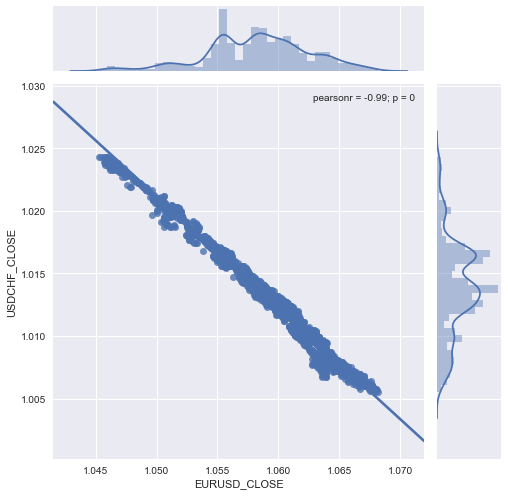

In [18]:
# ordinary least squares Visualisation
sns.jointplot(x="EURUSD_CLOSE", y="USDCHF_CLOSE", data=df, kind = 'reg',fit_reg= True, size = 7)
plt.show()

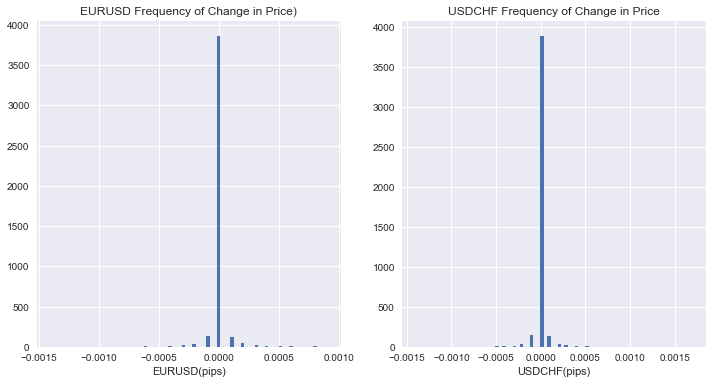

In [19]:
# Histogram Visualisation on Dataset
fig = plt.figure(figsize=(12,6))
xau = fig.add_subplot(121)
jpy = fig.add_subplot(122)


xau.hist(df.EURUSD_PIPCHG, bins=80)
xau.set_xlabel('EURUSD(pips)')
xau.set_title("EURUSD Frequency of Change in Price)")


jpy.hist(df.USDCHF_PIPCHG, bins=80)
jpy.set_xlabel('USDCHF(pips)')
jpy.set_title("USDCHF Frequency of Change in Price")

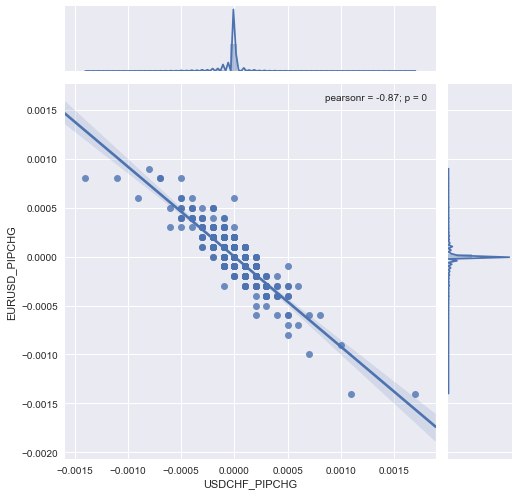

In [20]:
# Final!
# OLS regression 
# Cross Sectional Analysis on 1M Pip Changes Between EURUSD & USDCHF 
sns.jointplot(x="USDCHF_PIPCHG", y="EURUSD_PIPCHG", data=df, kind = 'reg',fit_reg= True, size = 7)
plt.show()

In [21]:
# ordinary least squares
# OLS Regression Statistics
# Complete and Significant Correlation Between EURUSD & USDCHF for 1M
# Details Outlined Above & Below Outline the inefficiencies in 1M Pip Changes Between EURUSD & USDCHF
# Potential for HFT/ Algoritmic Trading
m = ols('EURUSD_PIPCHG ~ USDCHF_PIPCHG ',df).fit()
print(m.summary())

# R-Squared of 82% Impressive!

                            OLS Regression Results                            
Dep. Variable:          EURUSD_PIPCHG   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 1.367e+04
Date:                Sat, 22 Jul 2017   Prob (F-statistic):               0.00
Time:                        02:22:03   Log-Likelihood:                 37315.
No. Observations:                4320   AIC:                        -7.463e+04
Df Residuals:                    4318   BIC:                        -7.461e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.204e-07   6.53e-07      0.644

In [22]:
# Details Above Outline the inefficiencies in 1M Pip Changes Between EURUSD & USDCHF
# Potential for HFT/ Algoritmic Trading Strategies Between Inefficient Correlations between the two pairs

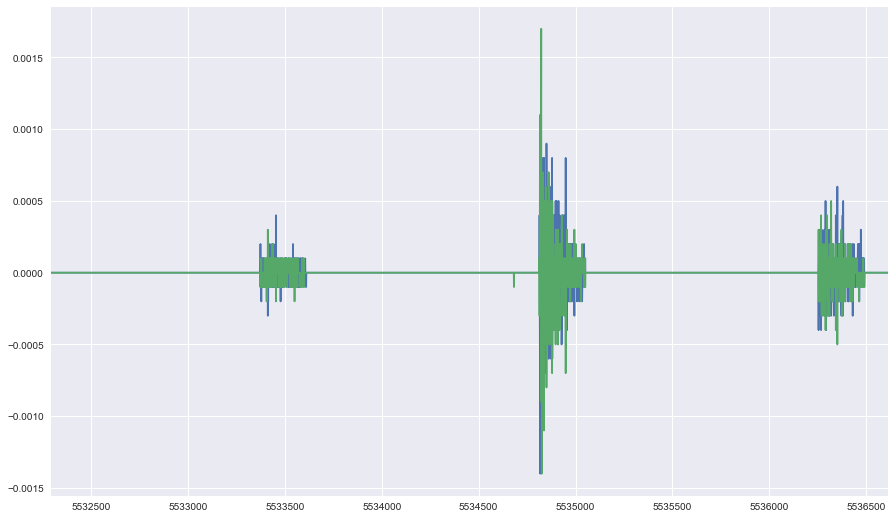

In [23]:
pylab.rcParams['figure.figsize'] = (15,9)

df["EURUSD_PIPCHG"].plot(grid = True)
df["USDCHF_PIPCHG"].plot(grid = True)